In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
# Define ticker symbols
tickers = ['SPY', 'TLT']

#Download daily data for the past 3 years
data = yf.download(tickers, start='2020-01-01', end='2025-08-03', auto_adjust = False)

data.head()

[*********************100%***********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker             SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2020-01-02  299.406403  117.578636  324.869995  137.009995  324.890015   
2020-01-03  297.139313  119.389381  322.410004  139.119995  323.640015   
2020-01-06  298.272797  118.711464  323.640015  138.330002  323.730011   
2020-01-07  297.434235  118.127922  322.730011  137.649994  323.540009   
2020-01-08  299.019409  117.346954  324.450012  136.740005  325.779999   

Price                          Low                    Open              \
Ticker             TLT         SPY         TLT         SPY         TLT   
Date                                                                     
2020-01-02  137.529999  322.529999  136.669998  323.540009  136.789993   
2020-01-03  139.160004  321.100006  137.880005  321.160004  138.270004   
2020-01-06  139.710007  320.359985  138.149994  320.489990  139.690002   
2020-01-07  138.470001  322.239990  137.639999  323.019989  138.220001   
2020-01-08  138.309998  322.670013  136.320007  322.940002  137.929993   

Price         Volume            
Ticker           SPY       TLT  
Date                            
2020-01-02  59151200  11034100  
2020-01-03  77709700  12366000  
2020-01-06  55653900  11369800  
2020-01-07  40496400   8381200  
2020-01-08  68296000  10621700

In [4]:
close_price = data["Adj Close"]
close_price.head()

Ticker,SPY,TLT
Date,,
2020-01-02,299.406403,117.578636
2020-01-03,297.139313,119.389381
2020-01-06,298.272797,118.711464
2020-01-07,297.434235,118.127922
2020-01-08,299.019409,117.346954


<function matplotlib.pyplot.show(close=None, block=None)>

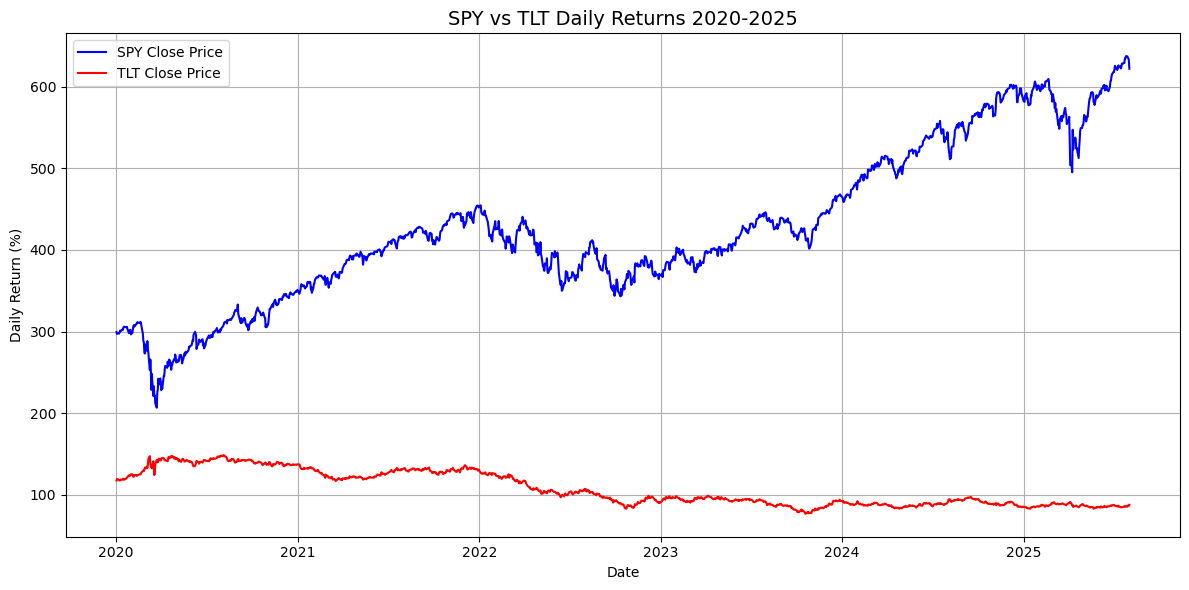

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(close_price["SPY"].index, close_price["SPY"], label="SPY Close Price", color = "blue")
plt.plot(close_price["TLT"].index, close_price["TLT"], label="TLT Close Price", color = "red")

plt.title("SPY vs TLT Daily Returns 2020-2025", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show

In [6]:
import pandas as pd

# Calculate daily returns
daily_return = data["Adj Close"].pct_change().dropna() * 100
daily_return.columns = [col + ' (%)' for col in daily_return.columns]

daily_return.head()

,SPY (%),TLT (%)
Date,,
2020-01-03,-0.757195,1.540029
2020-01-06,0.381465,-0.567821
2020-01-07,-0.281139,-0.491563
2020-01-08,0.532950,-0.661120
2020-01-09,0.678079,0.351033


<function matplotlib.pyplot.show(close=None, block=None)>

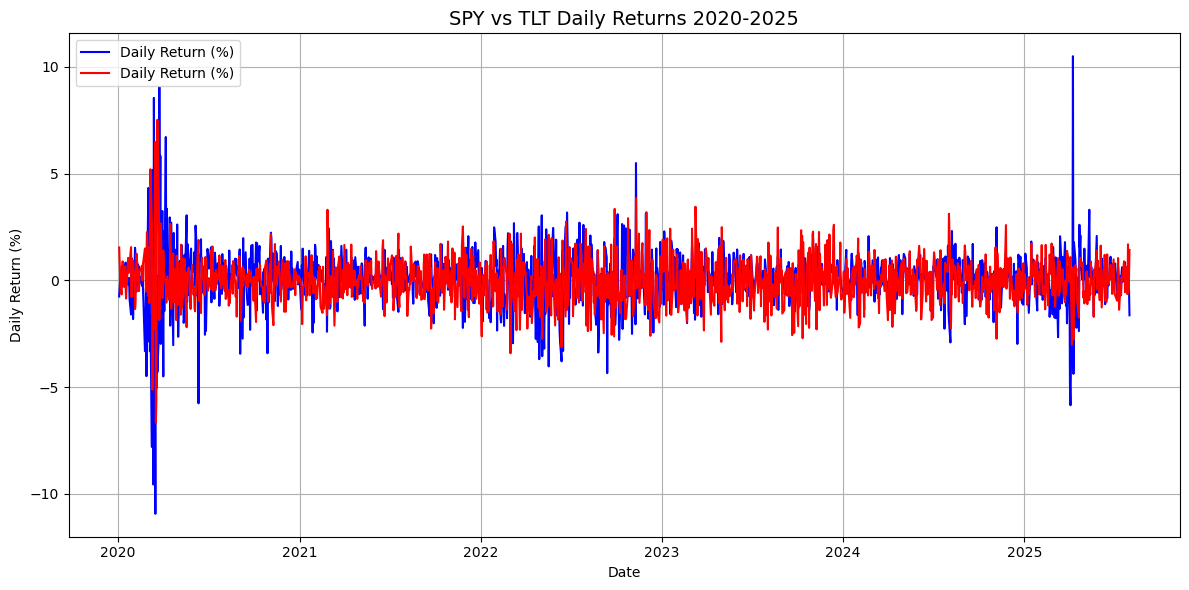

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_return["SPY (%)"].index, daily_return["SPY (%)"], label="Daily Return (%)", color = "blue")
plt.plot(daily_return["TLT (%)"].index, daily_return["TLT (%)"], label="Daily Return (%)", color = "red")

plt.title("SPY vs TLT Daily Returns 2020-2025", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show

Next steps:

annual return
annualized return
average return
std deviation
sharpe ratio
correlation
12-month rolling

CReate portfolio
- assume weights - 60% SPY, 40% TLT
- portfolio return = sumproduct(weights, individual avg returns)
- portfolio volatality: use covariance matrix & matrix math

scenario analysis
create a stress test: what happens during march 2020 (COVID crash)? analyze portfolio drawdowns

Annual Return = ((End of Year Price − Start of Year Price) / Start of Year Price) × 100

In [10]:
daily_return_decimal = daily_returns / 100
daily_return_decimal.head()

NameError: name 'daily_returns' is not defined

In [ ]:
# Ensure index is in datetime format
print(daily_return_decimal.index)

In [ ]:
# Group by year and apply geometric formula

annual_return_decimal = daily_return_decimal.groupby(daily_return_decimal.index.year).apply(lambda df: (1 + df).prod() - 1)
annual_return = daily_return_decimal.groupby(daily_return_decimal.index.year).apply(lambda df: (1 + df).prod() - 1) * 100
annual_return


In [ ]:
len(annual_return)

In [ ]:
print(annual_return.dtypes)

In [ ]:
daily_return = daily_return.dropna()
daily_return

In [ ]:
# Find the number of trading days in my data
n_days = len(daily_return_decimal)
n_days

In [ ]:
# There are 252 trading days in a year
total_product = ((1 + daily_return_decimal).prod())
total_product
# geometric_annualized_return = total_product**(252/n_days) won't work because total_product is negative and you can't raise a negative number to a fractional power

In [ ]:
import numpy as np
# np.log1p() is a numerically stable version of log(1+x), esp when x is small
annualized_log_return = np.log1p(daily_return_decimal).mean()*252
annualized_log_return = annualized_log_return*100
print("Log CAGR (%): ")
annualized_log_return

In [ ]:
cumulative_return_decimal = ((1+annual_return_decimal).prod() - 1)
cumulative_return = ((1+annual_return_decimal).prod() - 1)*100
cumulative_return

In [ ]:
start_date = data.index.min()
end_date = data.index.max()
n_years = (end_date - start_date).days/365
geometric_annualized_return_decimal = (1 + cumulative_return)**(1/n_years) - 1
geometric_annualized_return = geometric_annualized_return*100
print("Geometric CAGR (%): ")
geometric_annualized_return

Yearly Average Return

In [ ]:
yearly_average_return = annual_return_decimal.mean()
yearly_average_return_percent = yearly_average_return*100
print("Yearly Average Return (%): ")
yearly_average_return_percent

Daily Standard Deviation

In [30]:
daily_std = daily_return.std()
print("Daily standard deviation: ")
daily_std

Daily standard deviation: 


SPY (%)    1.341216
TLT (%)    1.107006
dtype: float64

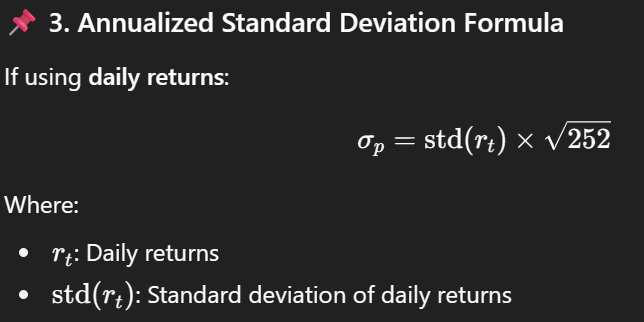

In [32]:
annualized_std = daily_std * (252**0.5)
print("Annualized standard deviation: ")
annualized_std

Annualized standard deviation: 


SPY (%)    21.291147
TLT (%)    17.573180
dtype: float64

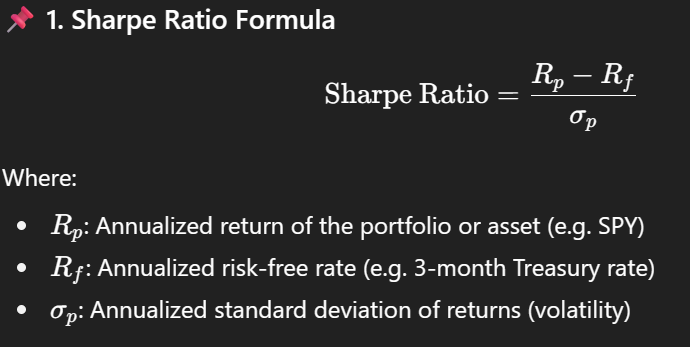